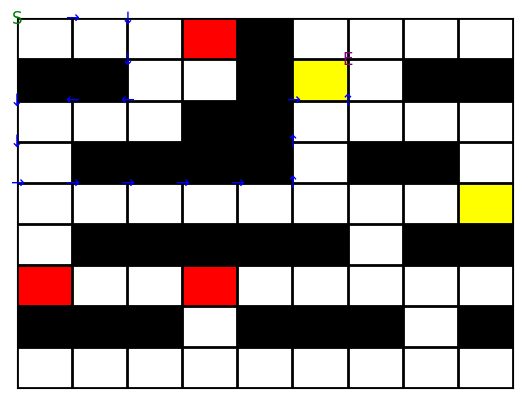

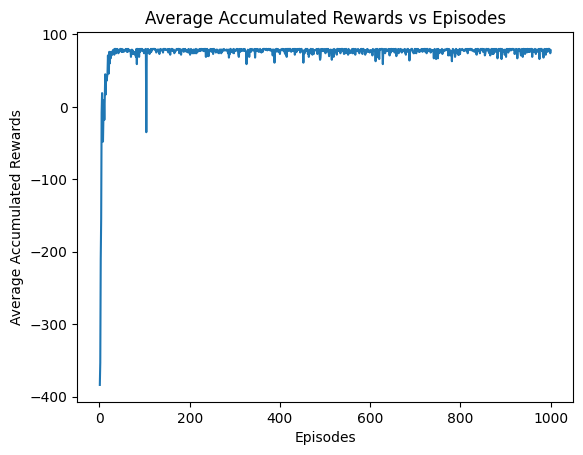

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Maze:
    def __init__(self, maze):
        self.maze = maze
        self.rows = len(maze)
        self.cols = len(maze[0])
        self.start_state = self.get_start_state()
        self.goal_state = self.get_goal_state()


    def get_start_state(self):
        for i in range(self.rows):
            for j in range(self.cols):
                if self.maze[i][j] == 'S':
                    return (i, j)
        raise ValueError("Start state not found in the maze")

    def get_goal_state(self):
        for i in range(self.rows):
            for j in range(self.cols):
                if self.maze[i][j] == 'E':
                    return (i, j)
        raise ValueError("Goal state not found in the maze")

    def get_next_state(self, state, action):
        x, y = state

        if action == 'U':
            x -= 1
        elif action == 'D':
            x += 1
        elif action == 'L':
            y -= 1
        elif action == 'R':
            y += 1

        if 0 <= x < self.rows and 0 <= y < self.cols and self.maze[x][y] != 'W':
            return (x, y)
        else:
            return state

    def get_reward(self, state):
        x, y = state

        if self.maze[x][y] == 'E':
            return 100
        elif self.maze[x][y] == 'W':
            return -100
        elif self.maze[x][y] == 'B':
            return -10
        elif self.maze[x][y] == 'O':
            return -5
        else:
            return -1




class QLearningAgent:
    def __init__(self, maze, gamma=0.95, alpha=0.3, epsilon=0.1, episodes=1000):
        self.maze = maze
        self.actions = ['U', 'D', 'L', 'R']
        self.n_states = maze.rows * maze.cols
        self.n_actions = len(self.actions)
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.episodes = episodes
        self.Q = np.zeros((self.n_states, self.n_actions))

        self.state_to_index = {}
        self.index_to_state = {}
        for i in range(maze.rows):
            for j in range(maze.cols):
                index = i * maze.cols + j
                self.state_to_index[(i, j)] = index
                self.index_to_state[index] = (i, j)


    def learn(self):
        accumulated_rewards = []

        for episode in range(self.episodes):
            state = self.maze.start_state
            total_reward = 0

            while state != self.maze.goal_state:
                if random.uniform(0, 1) < self.epsilon:
                    action = random.choice(self.actions)
                else:
                    action = self.actions[np.argmax(self.Q[self.state_to_index[state]])]

                next_state = self.maze.get_next_state(state, action)
                reward = self.maze.get_reward(next_state)
                total_reward += reward

                self.Q[self.state_to_index[state], self.actions.index(action)] = (
                    (1 - self.alpha) * self.Q[self.state_to_index[state], self.actions.index(action)] +
                    self.alpha * (reward + self.gamma * np.max(self.Q[self.state_to_index[next_state]]))
                )

                state = next_state

            accumulated_rewards.append(total_reward)

        return accumulated_rewards

def plot_rewards_vs_episodes(accumulated_rewards):
    plt.plot(range(1, len(accumulated_rewards) + 1), accumulated_rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Average Accumulated Rewards')
    plt.title('Average Accumulated Rewards vs Episodes')
    plt.show()





def find_optimal_path(agent):
    state = agent.maze.start_state
    optimal_path = []

    while state != agent.maze.goal_state:
        action = agent.actions[np.argmax(agent.Q[agent.state_to_index[state]])]
        next_state = agent.maze.get_next_state(state, action)
        optimal_path.append(next_state)
        state = next_state

    return optimal_path


maze_data = [['S', ' ', ' ', 'B', 'W', ' ', ' ', ' ', ' ', ' '],
             ['W', 'W', ' ', ' ', 'W', 'O', 'E', 'W', 'W', ' '],
             [' ', ' ', ' ', 'W', 'W', ' ', ' ', ' ', ' ', ' '],
             ['O', 'W', 'W', 'W', 'W', ' ', 'W', 'W', ' ', ' '],
             [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'O', ' '],
             [' ', 'W', 'W', 'W', 'W', 'W', ' ', 'W', 'W', ' '],
             ['B', ' ', ' ', 'B', ' ', ' ', ' ', ' ', ' ', ' '],
             ['W', 'W', 'W', ' ', 'W', 'W', 'W', ' ', 'W', ' '],
             [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
             [' ', ' ', 'W', 'W', 'W', 'W', 'W', 'W', ' ', ' ']]


import matplotlib.pyplot as plt

def visualize_maze_with_optimal_path(maze, optimal_path):
    path_directions = []
    path_indices = [agent.state_to_index[state] for state in optimal_path]

    for i, state in enumerate(optimal_path[:-1]):
        dx, dy = np.array(optimal_path[i + 1]) - np.array(state)
        if dy > 0:
            path_directions.append("→")
        elif dy < 0:
            path_directions.append("←")
        elif dx > 0:
            path_directions.append("↓")
        elif dx < 0:
            path_directions.append("↑")

    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(0, maze.cols, 1))
    ax.set_yticks(np.arange(0, maze.rows, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)

    for i, row in enumerate(maze.maze):
        for j, cell in enumerate(row):
            if (i, j) in optimal_path:
                index = optimal_path.index((i, j))
                if index < len(path_directions):
                    ax.text(j, i, path_directions[index], fontsize=12, ha='center', va='center', color='blue')
            else:
                if cell == 'W':
                    ax.add_patch(plt.Rectangle((j, i), 1, 1, color='black'))
                elif cell == 'B':
                    ax.add_patch(plt.Rectangle((j, i), 1, 1, color='red'))
                elif cell == 'O':
                    ax.add_patch(plt.Rectangle((j, i), 1, 1, color='yellow'))

    ax.text(maze.start_state[1], maze.start_state[0], 'S', fontsize=12, ha='center', va='center', color='green')
    ax.text(maze.goal_state[1], maze.goal_state[0], 'E', fontsize=12, ha='center', va='center', color='purple')
    plt.gca().invert_yaxis()
    plt.show()

maze = Maze(maze_data)

agent = QLearningAgent(maze, gamma=0.95, alpha=0.3, epsilon=0.1, episodes=1000)
accumulated_rewards = agent.learn()
optimal_path = find_optimal_path(agent)
visualize_maze_with_optimal_path(maze, optimal_path)
plot_rewards_vs_episodes(accumulated_rewards)